# Data preprocessing

# Load data
ref : http://insideairbnb.com/get-the-data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('listings.csv')
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,561418072780605554,https://www.airbnb.com/rooms/561418072780605554,20220607182017,2022-06-07,Double im Suburb Hostel,Die Unterkunft ist im suburbanen Raum vor den ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4109732,https://www.airbnb.com/users/show/4109732,...,4.89,4.67,5.0,NaN,t,3,0,2,1,2.55
1,39864901,https://www.airbnb.com/rooms/39864901,20220607182017,2022-06-07,Cozy home as close to nature as to Vienna 1,Unser Haus ist ein gemütlicher Ort an dem man ...,Die Unterkunft von Michael liegt in Perchtolds...,https://a0.muscache.com/pictures/4082268e-055c...,37411375,https://www.airbnb.com/users/show/37411375,...,4.95,4.90,5.0,NaN,f,3,0,3,0,0.65


In [3]:
#check features information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11274 entries, 0 to 11273
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11274 non-null  int64  
 1   listing_url                                   11274 non-null  object 
 2   scrape_id                                     11274 non-null  int64  
 3   last_scraped                                  11274 non-null  object 
 4   name                                          11262 non-null  object 
 5   description                                   11019 non-null  object 
 6   neighborhood_overview                         6270 non-null   object 
 7   picture_url                                   11274 non-null  object 
 8   host_id                                       11274 non-null  int64  
 9   host_url                                      11274 non-null 

# Delete features

Delete irrelavant columns such as urls, reviews and pictures, and redundent columns which have highly correlated with other columns.

In [4]:
#delete irrelvant columns
drop_cols = ['listing_url','last_scraped','scrape_id','name','description','neighborhood_overview',
             'picture_url','host_url','host_name', 'host_location', 'host_about', 'host_has_profile_pic',
             'host_thumbnail_url','host_picture_url', 'number_of_reviews_ltm','number_of_reviews_l30d',
             'review_scores_rating', 'review_scores_accuracy',
             'review_scores_cleanliness', 'review_scores_checkin',
             'review_scores_communication', 'review_scores_location','review_scores_value', 'reviews_per_month', 'number_of_reviews',
             'has_availability','host_verifications','host_neighbourhood', 'neighbourhood_group_cleansed',
             'calendar_updated', 'host_listings_count', 'host_identity_verified','neighbourhood',
             'bathrooms','license', 'calendar_last_scraped','first_review','last_review', 'amenities']

data = df.drop(drop_cols, axis = 1)
data.head(1)

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,...,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,561418072780605554,4109732,2012-11-10,within an hour,100%,100%,f,3.0,Penzing,48.21533,...,365.0,8,26,51,313,t,3,0,2,1


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#delete redundent columns : highly correlated columns
def delete_redundent(df,criteria):
    
    corr = df.corr()
    features = list(corr.columns)
    f, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corr, annot=True)
    
    drop_cols_corr = []
    for i in features:
        for j in features:
            if i != j:
                if corr.at[i,j] > criteria:
                    if corr[i].sum() > corr[j].sum():
                        drop_cols_corr.append(j)
                    else:
                        drop_cols_corr.append(i)
    
    return list(set(drop_cols_corr))

['minimum_nights_avg_ntm', 'maximum_maximum_nights', 'accommodates', 'availability_30', 'availability_60', 'calculated_host_listings_count_entire_homes', 'minimum_maximum_nights']


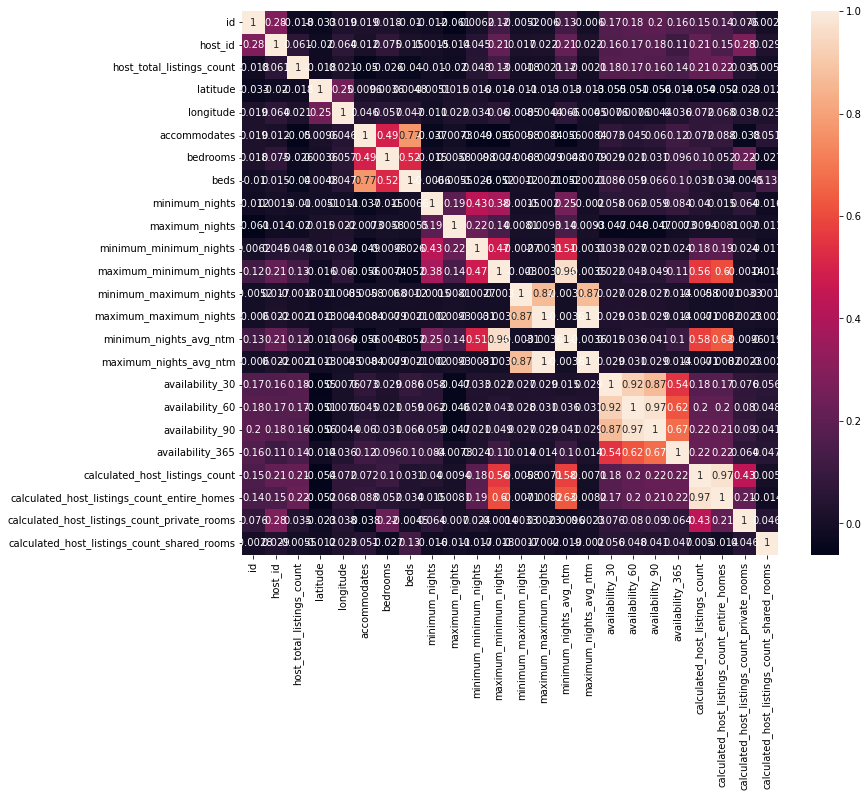

In [7]:
drop_cols_corr = delete_redundent(data,0.7)
print(drop_cols_corr)

In [8]:
data_features = data.drop(drop_cols_corr, axis = 1)
data_features.head(1)

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,...,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,maximum_nights_avg_ntm,availability_90,availability_365,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,561418072780605554,4109732,2012-11-10,within an hour,100%,100%,f,3.0,Penzing,48.21533,...,365,1,1,365.0,51,313,t,3,2,1


# Delete missing values

In [9]:
missing = data_features.isnull().sum()
missing = missing[missing > 0]/(data_features.shape[0]) * 100
missing.sort_values(inplace=True)
print("Missing number percentage :",missing,'\n\n')

data_features_dropna = data_features.copy()

print("Columns with more than 20% missing values:")
# Remove the columns with more than 20% missing values
for i, col in enumerate(missing.index):
    if missing[i] > 20:
        print(col)
        data_features_dropna.drop(columns=col, inplace=True)

# print('\n\n','Results:')
# data_features_dropna.info()

Missing number percentage : host_since                    0.026610
host_is_superhost             0.026610
host_total_listings_count     0.026610
bathrooms_text                0.079830
beds                          1.499024
bedrooms                     10.351251
host_acceptance_rate         28.756431
host_response_time           31.532730
host_response_rate           31.532730
dtype: float64 


Columns with more than 20% missing values:
host_acceptance_rate
host_response_time
host_response_rate


In [10]:
#drop Nan values in 
data_features_dropna = data_features_dropna.dropna()
data_features_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9968 entries, 0 to 11273
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9968 non-null   int64  
 1   host_id                                       9968 non-null   int64  
 2   host_since                                    9968 non-null   object 
 3   host_is_superhost                             9968 non-null   object 
 4   host_total_listings_count                     9968 non-null   float64
 5   neighbourhood_cleansed                        9968 non-null   object 
 6   latitude                                      9968 non-null   float64
 7   longitude                                     9968 non-null   float64
 8   property_type                                 9968 non-null   object 
 9   room_type                                     9968 non-null   

# Datatype 

(1) id = int -> string

(2) Price: object -> delete '$' symbols and change to 'float64'

(3) host_since : object -> datetime 

(4) bathroom_text : seperate bathroom_no and bathroom_shared


In [11]:
#(1) id = int -> string
type_cleansing = data_features_dropna.copy()
type_cleansing = type_cleansing.astype({'id':'string'})
type_cleansing = type_cleansing.astype({'host_id':'string'})

In [12]:
#(2) Price: object -> delete '$' symbols and change to 'float64'
type_cleansing['price'] = type_cleansing['price'].str.replace(',', '')
type_cleansing['price'] = type_cleansing['price'] .apply(lambda x: float(x.split()[0].replace('$', '')))
type_cleansing['price'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9968 entries, 0 to 11273
Series name: price
Non-Null Count  Dtype  
--------------  -----  
9968 non-null   float64
dtypes: float64(1)
memory usage: 155.8 KB


In [13]:
# #(2) ~Rate: object -> delete '%' symbols and change to 'float64'

# data_features['host_response_rate'] = data_features['host_response_rate'].str.replace('%', '')
# data_features['host_acceptance_rate'] = data_features['host_acceptance_rate'].str.replace('%', '')

# data_features = data_features.astype({'host_response_rate':'float64'})
# data_features = data_features.astype({'host_acceptance_rate':'float64'})

In [14]:
#(3) host_since : object -> datetime
type_cleansing = type_cleansing.astype({'host_since':'datetime64'})

In [15]:
#(4) bathroom_text : seperate bathroom_no and bathroom_shared

import re

bathroom_no = []
bathroom_shared = []

for i in type_cleansing['bathrooms_text']:
    if str(i)[0].isdigit():
        a = re.match(r'[^\s]+',str(i))
        bathroom_no.append(float(a[0]))
        
        b = re.match(r'^\S*\s+(\S+)',str(i))
        if 'shared' in b[1]:
            bathroom_shared.append('t')
        else:
            bathroom_shared.append('f')
    else:
        bathroom_no.append(float('NaN'))
        if 'shared' in str(i):
            bathroom_shared.append('t')
        else:
            bathroom_shared.append('f')
        
type_cleansing['bathroom_no'] = bathroom_no
type_cleansing['bathroom_shared'] = bathroom_shared
type_cleansing = type_cleansing.drop('bathrooms_text',axis = 1)
type_cleansing = type_cleansing.dropna().reset_index(drop = True)
type_cleansing.head(1)

,id,host_id,host_since,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,maximum_minimum_nights,maximum_nights_avg_ntm,availability_90,availability_365,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathroom_no,bathroom_shared
0,561418072780605554,4109732,2012-11-10,f,3.0,Penzing,48.21533,16.17153,Private room in bed and breakfast,Private room,...,1,365.0,51,313,t,3,2,1,1.0,t


# Detect outliers 

In [16]:
import numpy as np
from scipy import stats


def outlier_detect(df):
    numeric_cols = list(df.select_dtypes(include=['int64','float64']).columns)
    outlier_row = []
    
    for i in numeric_cols:
        print(str(i))
        
        z = np.abs(stats.zscore(df[i]))
        outliers = np.where(z>3)
        print("The number of outliers:",len(outliers[0]))
        outlier_row.append(list(outliers[0]))
        
        plt.boxplot(df[i], vert = False)
        fig = plt.figure(figsize =(10, 7))
        plt.show()
        
    outlier_row_flat = [x for sublist in outlier_row for x in sublist]
    print("Total", len(list(set(outlier_row_flat))), "outliers")
    return list(set(outlier_row_flat))
        
#But not to used this function because decision tree is robust to outlier

host_total_listings_count
The number of outliers: 66


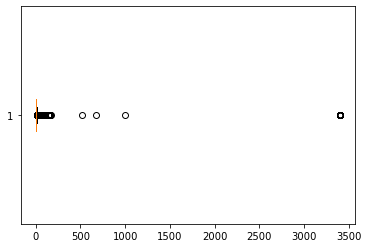

<Figure size 720x504 with 0 Axes>

latitude
The number of outliers: 151


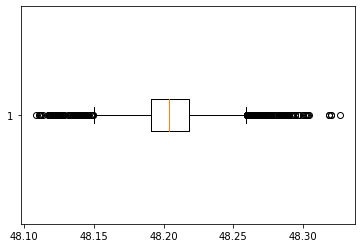

<Figure size 720x504 with 0 Axes>

longitude
The number of outliers: 148


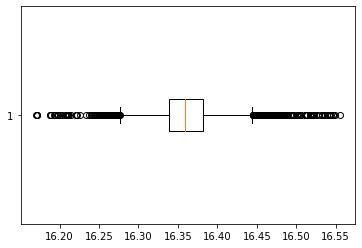

<Figure size 720x504 with 0 Axes>

bedrooms
The number of outliers: 95


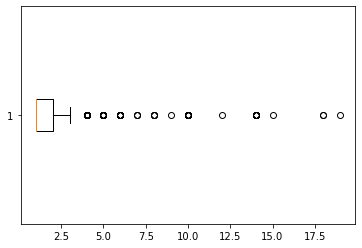

<Figure size 720x504 with 0 Axes>

beds
The number of outliers: 113


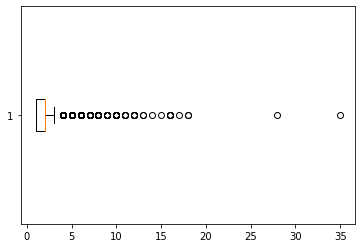

<Figure size 720x504 with 0 Axes>

price
The number of outliers: 65


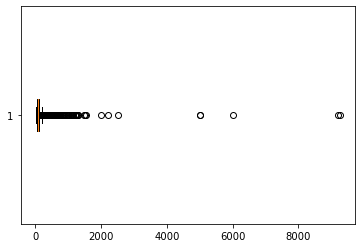

<Figure size 720x504 with 0 Axes>

minimum_nights
The number of outliers: 49


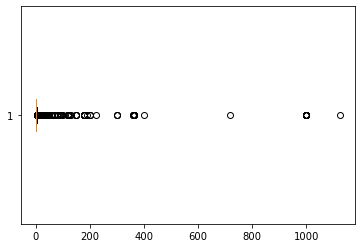

<Figure size 720x504 with 0 Axes>

maximum_nights
The number of outliers: 1


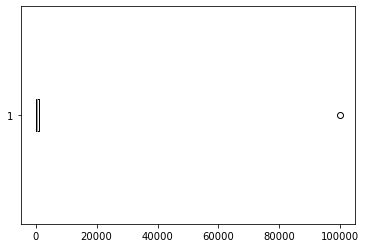

<Figure size 720x504 with 0 Axes>

minimum_minimum_nights
The number of outliers: 59


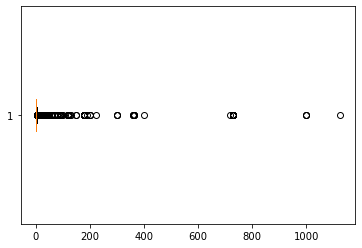

<Figure size 720x504 with 0 Axes>

maximum_minimum_nights
The number of outliers: 168


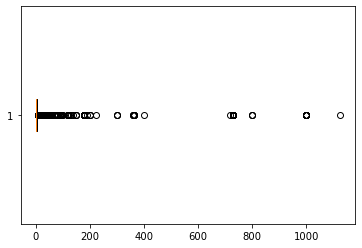

<Figure size 720x504 with 0 Axes>

maximum_nights_avg_ntm
The number of outliers: 4


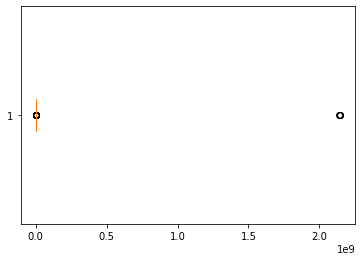

<Figure size 720x504 with 0 Axes>

availability_90
The number of outliers: 0


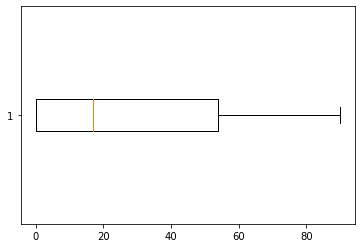

<Figure size 720x504 with 0 Axes>

availability_365
The number of outliers: 0


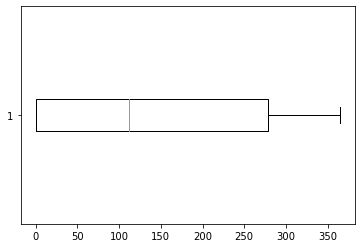

<Figure size 720x504 with 0 Axes>

calculated_host_listings_count
The number of outliers: 279


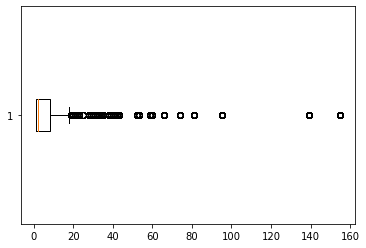

<Figure size 720x504 with 0 Axes>

calculated_host_listings_count_private_rooms
The number of outliers: 229


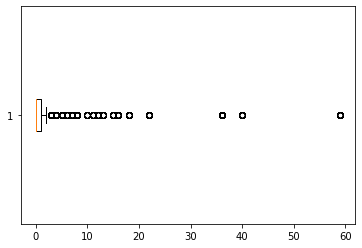

<Figure size 720x504 with 0 Axes>

calculated_host_listings_count_shared_rooms
The number of outliers: 165


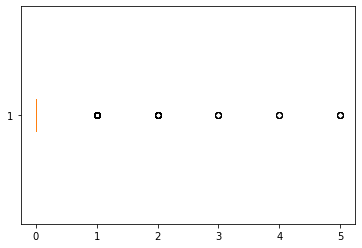

<Figure size 720x504 with 0 Axes>

bathroom_no
The number of outliers: 167


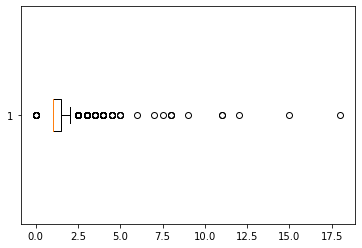

<Figure size 720x504 with 0 Axes>

Total 1139 outliers


In [17]:
data_features_outlier = type_cleansing.copy()

outlier_list = outlier_detect(data_features_outlier)

data_features_outlier_done = data_features_outlier.drop(data_features_outlier.index[outlier_list])
data_features_outlier_done = data_features_outlier_done.reset_index(drop = True)

In [18]:
data_features_outlier_done.to_csv('preprocessed_done.csv')
data_features_outlier_done

,id,host_id,host_since,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,maximum_minimum_nights,maximum_nights_avg_ntm,availability_90,availability_365,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathroom_no,bathroom_shared
0,349560,1771038,2012-02-18,f,2.0,Landstra§e,48.209160,16.395570,Entire rental unit,Entire home/apt,...,10,1125.0,28,290,t,2,0,0,1.0,f
1,15883,62142,2009-12-11,f,6.0,Donaustadt,48.242620,16.427670,Room in bed and breakfast,Hotel room,...,1,365.0,86,361,f,4,0,0,1.0,f
2,38768,166283,2010-07-14,t,1.0,Leopoldstadt,48.219240,16.378310,Entire rental unit,Entire home/apt,...,7,1125.0,17,107,t,3,0,0,1.0,f
3,349676,1771038,2012-02-18,f,2.0,Margareten,48.188250,16.347800,Entire rental unit,Entire home/apt,...,31,1125.0,47,322,t,2,0,0,1.0,f
4,358058,1785960,2012-02-21,t,2.0,Ottakring,48.219120,16.309370,Private room in rental unit,Private room,...,1,200.0,5,223,f,2,2,0,1.5,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8782,640958215190351335,28475838,2015-02-27,f,0.0,Rudolfsheim-Fnfhaus,48.201571,16.329902,Private room in rental unit,Private room,...,21,365.0,50,308,f,1,1,0,1.0,t
8783,640982077226574390,227502569,2018-11-25,f,1.0,Alsergrund,48.216751,16.342108,Entire condo,Entire home/apt,...,2,1125.0,60,335,t,1,0,0,1.5,f
8784,641084278385339663,245165047,2019-02-24,f,1.0,Neubau,48.202980,16.357662,Entire rental unit,Entire home/apt,...,2,1125.0,86,117,t,1,0,0,1.5,f
8785,641149330337566708,449607864,2022-03-14,t,10.0,Favoriten,48.177937,16.377406,Entire rental unit,Entire home/apt,...,1,365.0,60,335,t,10,8,0,1.0,f


# Encoding : Datatype = object

In [19]:
obj = data_features_outlier_done.select_dtypes(include=['object'])
obj.head(1)

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,instant_bookable,bathroom_shared
0,f,Landstra§e,Entire rental unit,Entire home/apt,t,f


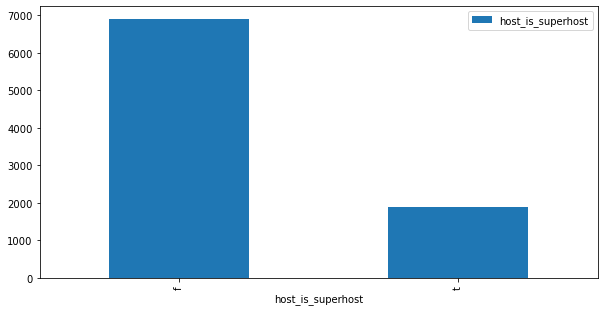

C:\Users\sooje\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sooje\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sooje\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


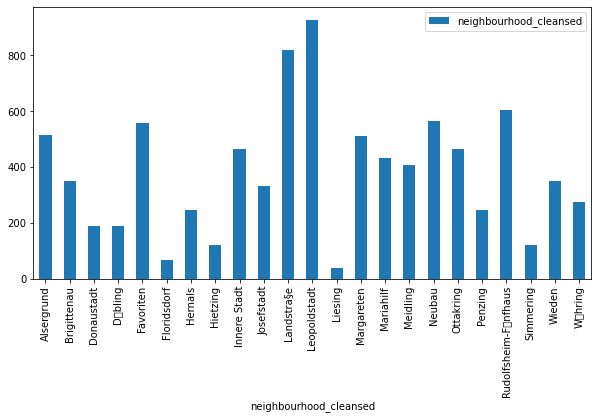

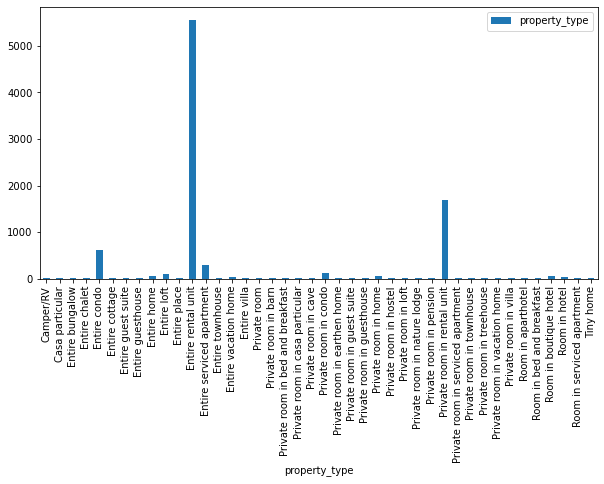

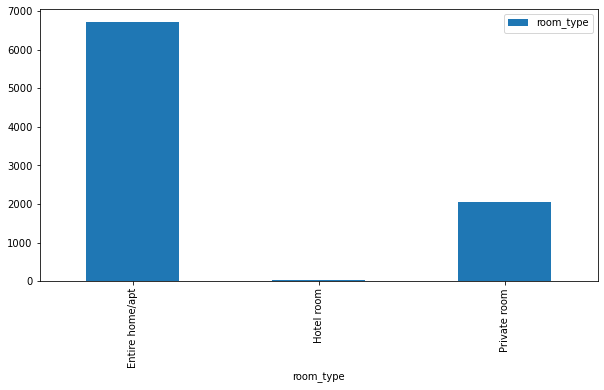

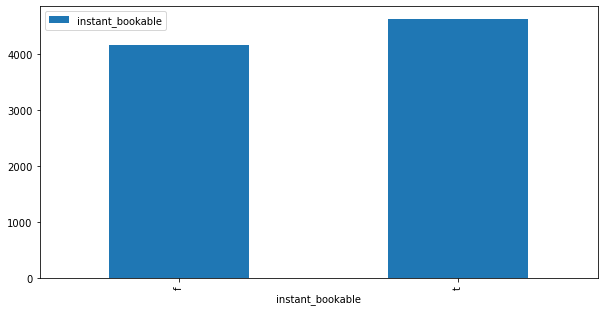

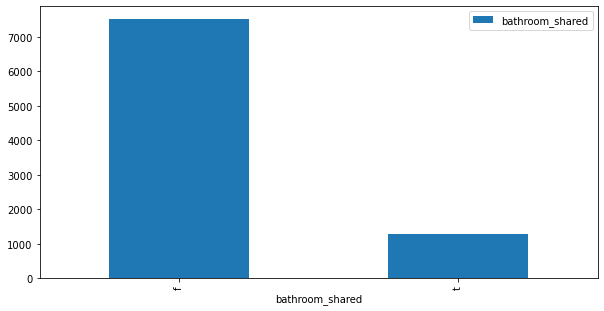

In [20]:
for i in obj.columns:
    values = obj.groupby([i])[i].count()
    data = values.to_frame()
    data.plot(kind="bar",figsize=(10, 5))

In [21]:
#encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

encoded = data_features_outlier_done.copy()
obj = encoded.select_dtypes(include=['object'])
obj.columns

Index(['host_is_superhost', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'instant_bookable', 'bathroom_shared'],
      dtype='object')

In [22]:
dic = {}
for i in obj.columns:
    le.fit(obj[i])
    temp = le.transform(obj[i])


    encoded[str(i)] = temp
    
    label  = list(le.inverse_transform([*(range(len(set(temp))))]))
    dic.update({str(i):label})
        
# # enc = pd.DataFrame.from_dict(dic)
# # enc

print(dic)
encoded.head()

{'host_is_superhost': ['f', 't'], 'neighbourhood_cleansed': ['Alsergrund', 'Brigittenau', 'Donaustadt', 'D\x9abling', 'Favoriten', 'Floridsdorf', 'Hernals', 'Hietzing', 'Innere Stadt', 'Josefstadt', 'Landstra§e', 'Leopoldstadt', 'Liesing', 'Margareten', 'Mariahilf', 'Meidling', 'Neubau', 'Ottakring', 'Penzing', 'Rudolfsheim-F\x9fnfhaus', 'Simmering', 'Wieden', 'W\x8ahring'], 'property_type': ['Camper/RV', 'Casa particular', 'Entire bungalow', 'Entire chalet', 'Entire condo', 'Entire cottage', 'Entire guest suite', 'Entire guesthouse', 'Entire home', 'Entire loft', 'Entire place', 'Entire rental unit', 'Entire serviced apartment', 'Entire townhouse', 'Entire vacation home', 'Entire villa', 'Private room', 'Private room in barn', 'Private room in bed and breakfast', 'Private room in casa particular', 'Private room in cave', 'Private room in condo', 'Private room in earthen home', 'Private room in guest suite', 'Private room in guesthouse', 'Private room in home', 'Private room in hostel'

,id,host_id,host_since,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,maximum_minimum_nights,maximum_nights_avg_ntm,availability_90,availability_365,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathroom_no,bathroom_shared
0,349560,1771038,2012-02-18,0,2.0,10,48.20916,16.39557,11,0,...,10,1125.0,28,290,1,2,0,0,1.0,0
1,15883,62142,2009-12-11,0,6.0,2,48.24262,16.42767,37,1,...,1,365.0,86,361,0,4,0,0,1.0,0
2,38768,166283,2010-07-14,1,1.0,11,48.21924,16.37831,11,0,...,7,1125.0,17,107,1,3,0,0,1.0,0
3,349676,1771038,2012-02-18,0,2.0,13,48.18825,16.34780,11,0,...,31,1125.0,47,322,1,2,0,0,1.0,0
4,358058,1785960,2012-02-21,1,2.0,17,48.21912,16.30937,30,2,...,1,200.0,5,223,0,2,2,0,1.5,0


In [23]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            8787 non-null   string        
 1   host_id                                       8787 non-null   string        
 2   host_since                                    8787 non-null   datetime64[ns]
 3   host_is_superhost                             8787 non-null   int32         
 4   host_total_listings_count                     8787 non-null   float64       
 5   neighbourhood_cleansed                        8787 non-null   int32         
 6   latitude                                      8787 non-null   float64       
 7   longitude                                     8787 non-null   float64       
 8   property_type                                 8787 non-null   int32 

# Normalization 

In [24]:
from sklearn import preprocessing
def standardization(df_input):
    df = df_input.copy()
    numeric_cols = list(df.select_dtypes(include=['int64','float64']).columns)
    x = df[numeric_cols].values
    scaler = preprocessing.StandardScaler().fit(x)
    x_scaled = scaler.transform(x)
    
    df_temp = pd.DataFrame(x_scaled, columns=numeric_cols, index = df.index)
    for i in numeric_cols:
        df[i] = df_temp[i]
    
    return df

In [25]:
from sklearn.preprocessing import Normalizer
def normalization(df_input):
    df = df_input.copy()
    numeric_cols = list(df.select_dtypes(include=['int64','float64']).columns)
    
    x = df[numeric_cols].values
    transformer = Normalizer().fit(x)
    x_scaled = transformer.transform(x)
    
    df_temp = pd.DataFrame(x_scaled, columns=numeric_cols, index = df.index)
    for i in numeric_cols:
        df[i] = df_temp[i]
    
    return df

In [26]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

def normalization(df_input):
    df = df_input.copy()
    numeric_cols = list(df.select_dtypes(include=['int64','float64']).columns)
    print()
    x = df[numeric_cols].values
    x_scaled = min_max_scaler.fit_transform(x)
    
    df_temp = pd.DataFrame(x_scaled, columns=numeric_cols, index = df.index)
    for i in numeric_cols:
        df[i] = df_temp[i]
    
    return df

In [27]:
normalized = standardization(encoded)
normalized.head(1)

,id,host_id,host_since,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,maximum_minimum_nights,maximum_nights_avg_ntm,availability_90,availability_365,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathroom_no,bathroom_shared
0,349560,1771038,2012-02-18,0,-0.328105,10,0.224939,1.18834,11,0,...,0.378027,0.470677,0.048426,1.186298,1,-0.390542,-0.317633,0.0,-0.532408,0


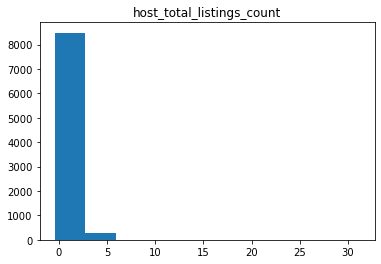

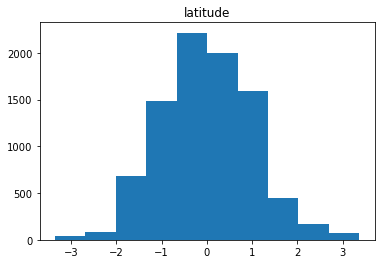

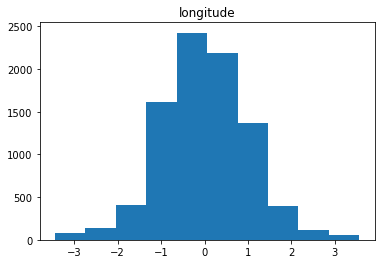

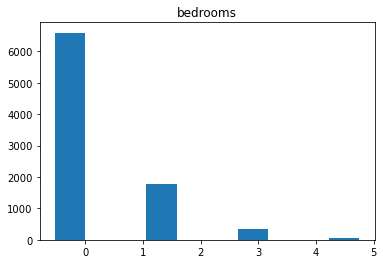

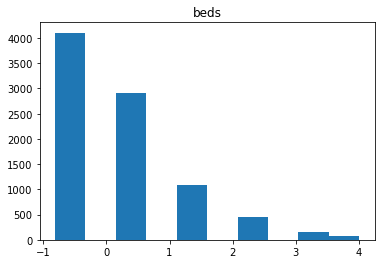

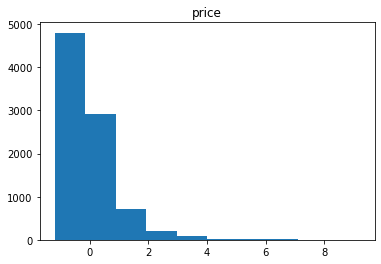

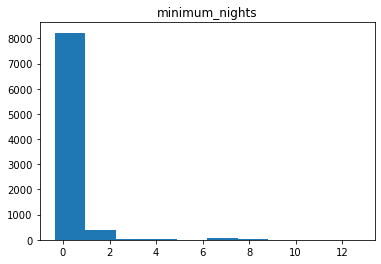

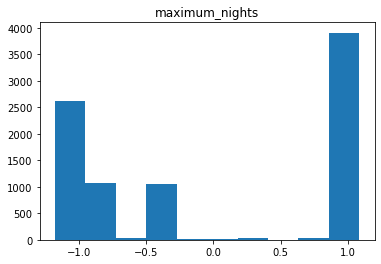

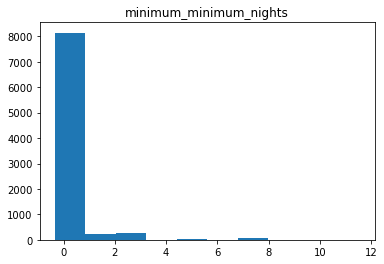

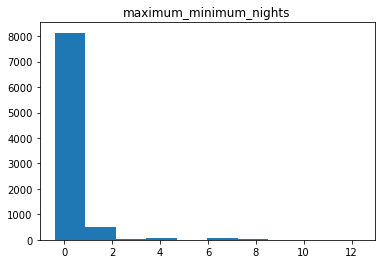

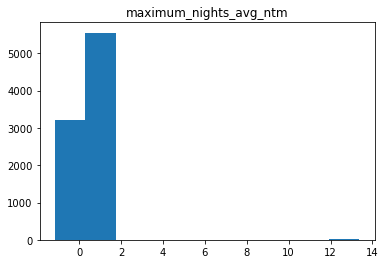

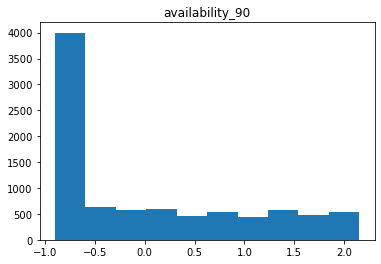

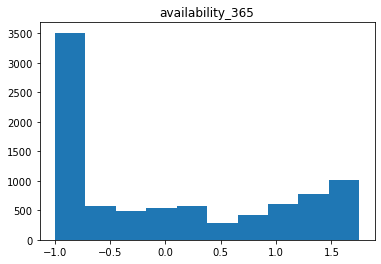

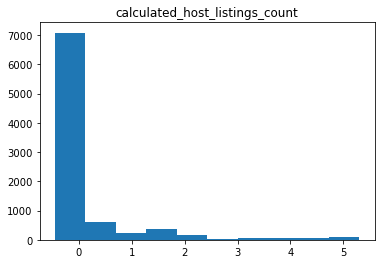

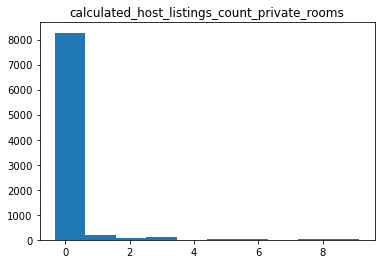

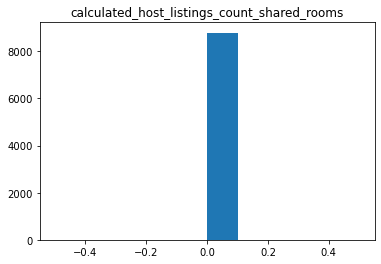

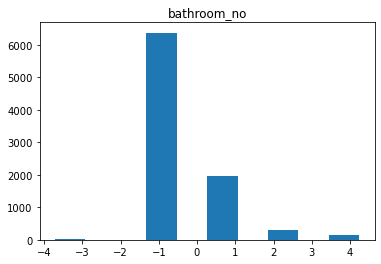

In [28]:
numeric_cols = list(normalized.select_dtypes(include=['int64','float64']).columns)
for i in numeric_cols:
    plt.figure()
    plt.hist(normalized[i])
    plt.title(i)
    plt.show

# Divide 'new host' as a test set

In [29]:
test_new_hosts = normalized[normalized['host_since']>='2021-01-01']
test_new_hosts = test_new_hosts.drop(['host_is_superhost'], axis = 1)
test_new_hosts = test_new_hosts.reset_index(drop = True)
training_hosts = normalized[normalized['host_since']<'2021-01-01']
training_hosts = training_hosts.reset_index(drop = True)
print("# of data for prediction :", len(test_new_hosts))
print("# of data for training :", len(training_hosts))

# of data for prediction : 591
# of data for training : 8196


In [30]:
training_hosts.groupby(['host_is_superhost'])['id'].count()

host_is_superhost
0    6394
1    1802
Name: id, dtype: int64

# Train Decision tree 

In [31]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [32]:
#get train / test data 

data_df = training_hosts.copy()

feature_cols = ['host_total_listings_count', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'maximum_nights_avg_ntm', 'availability_90',
       'availability_365', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'bathroom_no',
       'bathroom_shared']

X = data_df[feature_cols] # Features
y = data_df['host_is_superhost']# Target variable

# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#define evaluate model function
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Precision :", precision_score(y_train, dt_classifier.predict(X_train)))
    print("Train Recall :", recall_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Precision score :", precision_score(y_test, dt_classifier.predict(X_test)))
    print("Test Recall:", recall_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    return [accuracy_score(y_train, dt_classifier.predict(X_train)), precision_score(y_train, dt_classifier.predict(X_train)),
            recall_score(y_train, dt_classifier.predict(X_train)),
            accuracy_score(y_test, dt_classifier.predict(X_test)),precision_score(y_test, dt_classifier.predict(X_test)),
            recall_score(y_test, dt_classifier.predict(X_test))]

In [34]:
#define decision tree function
def decision_tree(criterion_type = 'gini', max_depth_num=None, min_split_num=2):
    clf = DecisionTreeClassifier(criterion=criterion_type,
    max_depth=max_depth_num,
    min_samples_split=min_split_num)
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    #evalute modle
    score = evaluate_model(clf)
    return clf, score

In [35]:
deault, defalut_score = decision_tree()

Train Accuracy : 1.0
Train Precision : 1.0
Train Recall : 1.0
Train Confusion Matrix:
[[4484    0]
 [   0 1253]]
--------------------------------------------------
Test Accuracy : 0.8235054900366002
Test Precision score : 0.6007005253940455
Test Recall: 0.6247723132969034
Test Confusion Matrix:
[[1682  228]
 [ 206  343]]


# Hyper parameter tunning

In [36]:
clf_depth_5, clf_depth_5_score = decision_tree(max_depth_num=5)

Train Accuracy : 0.8018127941432804
Train Precision : 0.967741935483871
Train Recall : 0.09577015163607343
Train Confusion Matrix:
[[4480    4]
 [1133  120]]
--------------------------------------------------
Test Accuracy : 0.7925986173241155
Test Precision score : 0.8823529411764706
Test Recall: 0.08196721311475409
Test Confusion Matrix:
[[1904    6]
 [ 504   45]]


In [37]:
clf_depth_5_ent, clf_depth_5_ent_score = decision_tree(max_depth_num=5, criterion_type='entropy')

Train Accuracy : 0.8021614084016037
Train Precision : 0.9609375
Train Recall : 0.09816440542697526
Train Confusion Matrix:
[[4479    5]
 [1130  123]]
--------------------------------------------------
Test Accuracy : 0.7930052867019114
Test Precision score : 0.8333333333333334
Test Recall: 0.09107468123861566
Test Confusion Matrix:
[[1900   10]
 [ 499   50]]


In [38]:
clf_depth_10, clf_depth_10_score = decision_tree(max_depth_num=10)

Train Accuracy : 0.8610772180582186
Train Precision : 0.7753623188405797
Train Recall : 0.5123703112529928
Train Confusion Matrix:
[[4298  186]
 [ 611  642]]
--------------------------------------------------
Test Accuracy : 0.81862545750305
Test Precision score : 0.6434540389972145
Test Recall: 0.4207650273224044
Test Confusion Matrix:
[[1782  128]
 [ 318  231]]


In [39]:
clf_split, clf_split_score = decision_tree(min_split_num=1000)

Train Accuracy : 0.80617047237232
Train Precision : 0.6658823529411765
Train Recall : 0.22585794094173983
Train Confusion Matrix:
[[4342  142]
 [ 970  283]]
--------------------------------------------------
Test Accuracy : 0.7966653111020741
Test Precision score : 0.6206896551724138
Test Recall: 0.22950819672131148
Test Confusion Matrix:
[[1833   77]
 [ 423  126]]


In [40]:
clf_entropy,clf_entropy_score = decision_tree(criterion_type='entropy')

Train Accuracy : 1.0
Train Precision : 1.0
Train Recall : 1.0
Train Confusion Matrix:
[[4484    0]
 [   0 1253]]
--------------------------------------------------
Test Accuracy : 0.8300122000813339
Test Precision score : 0.6184448462929476
Test Recall: 0.6229508196721312
Test Confusion Matrix:
[[1699  211]
 [ 207  342]]


In [41]:
clf_15_entropy, clf_15_entropy_score= decision_tree(criterion_type='entropy',max_depth_num=15,min_split_num=200)

Train Accuracy : 0.8305734704549416
Train Precision : 0.6108918705603789
Train Recall : 0.6177174780526736
Train Confusion Matrix:
[[3991  493]
 [ 479  774]]
--------------------------------------------------
Test Accuracy : 0.8161854412362749
Test Precision score : 0.5920303605313093
Test Recall: 0.5683060109289617
Test Confusion Matrix:
[[1695  215]
 [ 237  312]]


In [42]:
clf_all, clf_all_score = decision_tree(max_depth_num=5, min_split_num=1000)

Train Accuracy : 0.7925745162977166
Train Precision : 1.0
Train Recall : 0.05027932960893855
Train Confusion Matrix:
[[4484    0]
 [1190   63]]
--------------------------------------------------
Test Accuracy : 0.7873119154127695
Test Precision score : 1.0
Test Recall: 0.04735883424408015
Test Confusion Matrix:
[[1910    0]
 [ 523   26]]


In [43]:
clf_all_entropy, clf_all_entropy_score = decision_tree(criterion_type='entropy', max_depth_num=5, min_split_num=1000)

Train Accuracy : 0.792400209168555
Train Precision : 1.0
Train Recall : 0.04948124501197127
Train Confusion Matrix:
[[4484    0]
 [1191   62]]
--------------------------------------------------
Test Accuracy : 0.7873119154127695
Test Precision score : 1.0
Test Recall: 0.04735883424408015
Test Confusion Matrix:
[[1910    0]
 [ 523   26]]


In [44]:
#Save all results in a dataframe
exp = [defalut_score, clf_depth_5_score, clf_depth_10_score, clf_depth_5_ent_score,
       clf_split_score, clf_entropy_score, clf_all_score, clf_all_entropy_score]
df_ind = ['defalut', 'clf_depth_5', 'clf_depth_10', 'clf_depth_5_ent', 'clf_split', 'clf_entropy','clf_all', 'clf_all_entropy']
df_cols = ['Train-Acc','Train-Pre', 'Train-Recall','Test-Acc','Test-Pre','Test-Recall']
score_df = pd.DataFrame(index = df_ind, columns = df_cols)


for i in range(len(score_df)):
    score_df.loc[df_ind[i]] = exp[i]
score_df

,Train-Acc,Train-Pre,Train-Recall,Test-Acc,Test-Pre,Test-Recall
defalut,1.0,1.0,1.0,0.823505,0.600701,0.624772
clf_depth_5,0.801813,0.967742,0.09577,0.792599,0.882353,0.081967
clf_depth_10,0.861077,0.775362,0.51237,0.818625,0.643454,0.420765
clf_depth_5_ent,0.802161,0.960938,0.098164,0.793005,0.833333,0.091075
clf_split,0.80617,0.665882,0.225858,0.796665,0.62069,0.229508
clf_entropy,1.0,1.0,1.0,0.830012,0.618445,0.622951
clf_all,0.792575,1.0,0.050279,0.787312,1.0,0.047359
clf_all_entropy,0.7924,1.0,0.049481,0.787312,1.0,0.047359


In [45]:
from sklearn import tree
text_representation = tree.export_text(clf_depth_5, feature_names = feature_cols)
print(text_representation)

|--- availability_365 <= -1.00
|   |--- host_total_listings_count <= -0.16
|   |   |--- calculated_host_listings_count <= -0.24
|   |   |   |--- latitude <= 3.11
|   |   |   |   |--- calculated_host_listings_count <= -0.42
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- calculated_host_listings_count >  -0.42
|   |   |   |   |   |--- class: 0
|   |   |   |--- latitude >  3.11
|   |   |   |   |--- latitude <= 3.19
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- latitude >  3.19
|   |   |   |   |   |--- class: 0
|   |   |--- calculated_host_listings_count >  -0.24
|   |   |   |--- maximum_nights <= -1.12
|   |   |   |   |--- class: 1
|   |   |   |--- maximum_nights >  -1.12
|   |   |   |   |--- minimum_nights <= 0.49
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- minimum_nights >  0.49
|   |   |   |   |   |--- class: 1
|   |--- host_total_listings_count >  -0.16
|   |   |--- maximum_nights <= 1.08
|   |   |   |--- longitude <= -0.74
|   |   |   |   |--- class: 0
|  

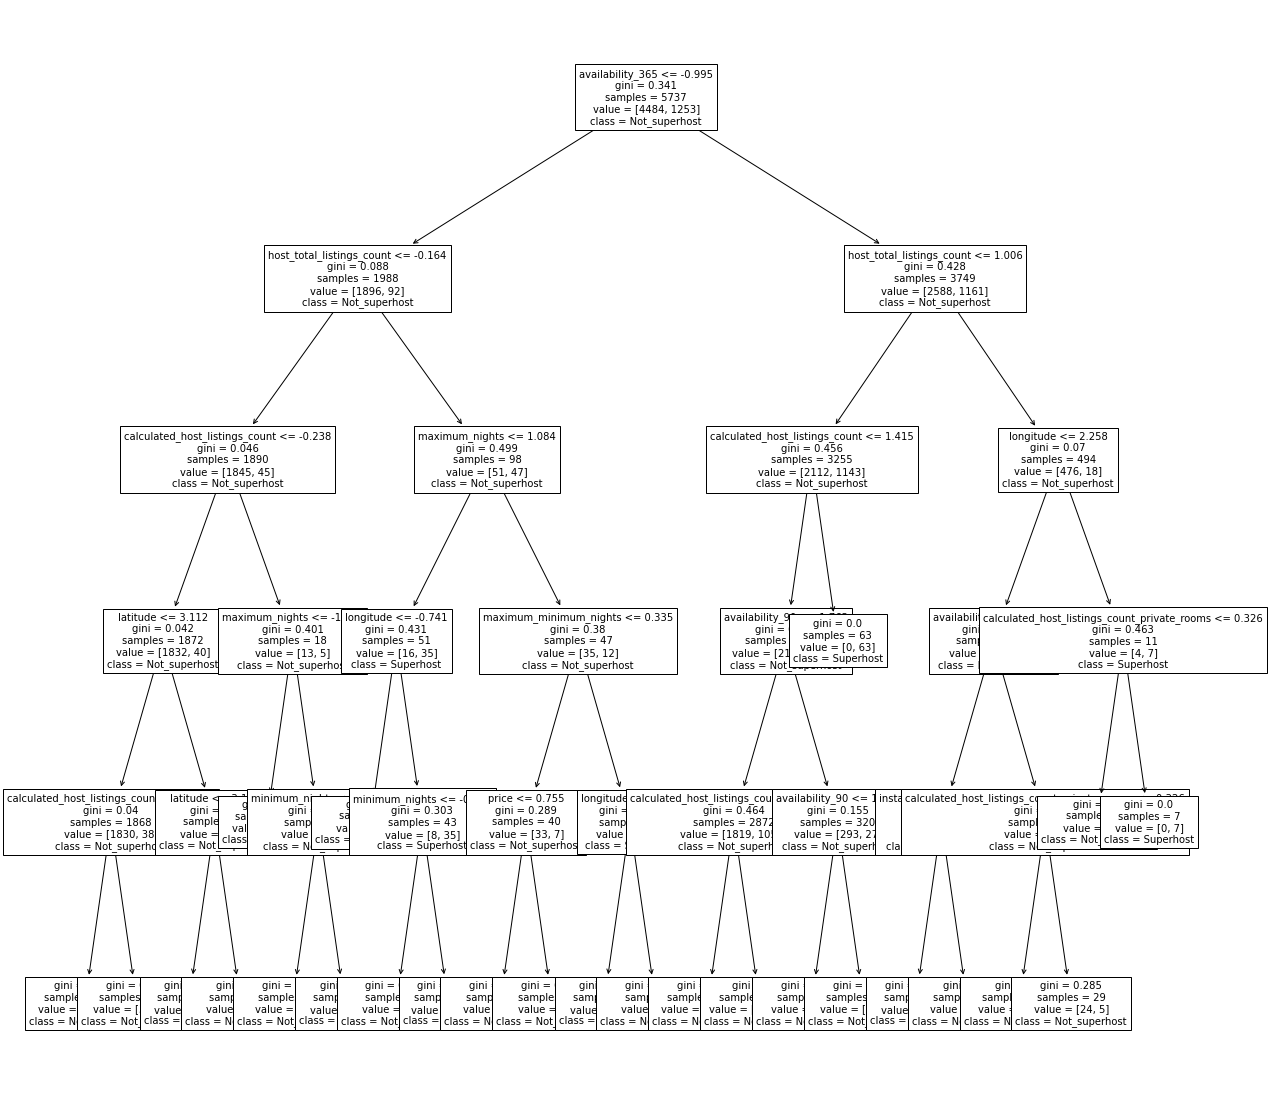

In [46]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf_depth_5, class_names=['Not_superhost', "Superhost"], feature_names = feature_cols, fontsize=10)
plt.show()

# Predict superhost candidates

In [47]:
newX = test_new_hosts[feature_cols] # Features
newpred = clf_depth_5.predict(newX)
test_new_hosts['Superhost_prediction'] = newpred
test_new_hosts[test_new_hosts['Superhost_prediction']==1]

,id,host_id,host_since,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bedrooms,...,maximum_nights_avg_ntm,availability_90,availability_365,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathroom_no,bathroom_shared,Superhost_prediction
8,25558630,384050980,2021-01-11,4.635424,2,2.194609,2.547219,11,0,-0.528607,...,0.470677,0.218211,1.321940,1,2.118319,9.128981,0.0,1.058298,0,1
12,31971725,384050980,2021-01-11,4.635424,8,0.417613,0.465039,11,0,-0.528607,...,-1.033790,-0.902374,-0.999049,1,2.118319,9.128981,0.0,-0.532408,0,1
45,47574696,384050980,2021-01-11,4.635424,16,-0.012238,-0.589910,11,0,-0.528607,...,0.470677,-0.902374,-0.999049,1,2.118319,9.128981,0.0,-0.532408,0,1
47,46366103,384050980,2021-01-11,4.635424,2,1.610829,2.567438,25,2,-0.528607,...,0.470677,1.610453,1.630903,1,2.118319,9.128981,0.0,4.239709,1,1
48,46367123,384050980,2021-01-11,4.635424,2,1.540147,2.608527,25,2,-0.528607,...,0.470677,0.286126,1.337012,1,2.118319,9.128981,0.0,4.239709,1,1
49,46367125,384050980,2021-01-11,4.635424,2,1.553236,2.592222,25,2,-0.528607,...,0.470677,0.320083,1.344547,1,2.118319,9.128981,0.0,4.239709,1,1
51,46367133,384050980,2021-01-11,4.635424,2,1.627583,2.570699,25,2,-0.528607,...,0.470677,0.320083,1.344547,1,2.118319,9.128981,0.0,4.239709,1,1
52,46367137,384050980,2021-01-11,4.635424,2,1.633866,2.624832,25,2,-0.528607,...,0.470677,0.897354,1.472654,1,2.118319,9.128981,0.0,4.239709,1,1
127,51011320,384050980,2021-01-11,4.635424,1,1.232811,0.323183,4,0,-0.528607,...,0.470677,-0.902374,-0.999049,1,2.118319,9.128981,0.0,-0.532408,0,1
254,53119230,426013997,2021-10-05,-0.421757,13,-1.062519,-0.032597,11,0,1.231481,...,-1.121005,-0.902374,-0.999049,0,-0.084583,-0.317633,0.0,1.058298,0,1
